# Example of using Triple Collocation 
## to estimate the accuracy of measurements, given (at least) three independent observations of the same quantity

Stoffelen, Ad. "Toward the true near‐surface wind speed: Error modeling and calibration using triple collocation." Journal of geophysical research: oceans 103.C4 (1998): 7755-7766.

Qiao, Dejing, et al. "Uncertainty Characterization of Ground‐Based, Satellite, and Reanalysis Snow Depth Products Using Extended Triple Collocation." Water Resources Research 58.4 (2022): e2021WR030895.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The triple collocation algorithm

In [89]:
def tricolo(measurements):
    
    Q = np.cov(measurements)
    
    var = []
    var.append ((Q[0,0] - Q[0,1]*Q[0,2] / Q[1,2]))
    var.append ((Q[1,1] - Q[0,1]*Q[1,2] / Q[0,2]))
    var.append ((Q[2,2] - Q[0,2]*Q[1,2] / Q[0,1]))

    var = np.array(var)
    var[var<0] = 0
    std = np.sqrt(var)
    
    return var,std,Q

# First: example with toy data

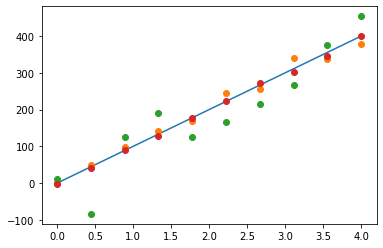

Estimated std: [21.85 60.89  0.  ]
Actual std: [25 50  5]


In [92]:
# mean and standard deviation
mu = np.array((0,0,0))
sigma = np.array((25,50,5))
N_samples = 10

time = np.linspace(0,4,N_samples) # yr
rate = 100 # m/yr
displacement = time * rate

measurement = []
for m,s in zip(mu,sigma):
    noise = np.random.normal(m, s, len(time))
    measurement.append (displacement + noise)

showPlots = True
if showPlots:
    plt.subplots()
    plt.plot(time, displacement)
    for m in measurement: plt.plot(time, m,'o')
    plt.show()



var,std,Q = tricolo(measurement)
print(f'Estimated std: {np.round(std,2)}')
print(f'Actual std: {sigma}')

# How much data do we need to get the method to work? Let's iterate to get a sense of convergence.

/home/bradlipovsky/anaconda3/envs/comcat/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Degrees of freedom <= 0 for slice
  This is separate from the ipykernel package so we can avoid doing imports until


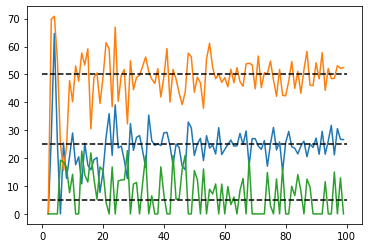

In [105]:
estimate = []
N_samples = 100
for N in range(N_samples):

    time = np.linspace(0,4,N) # yr
    rate = 100 # m/yr
    displacement = time * rate

    # mean and standard deviation
    mu = np.array((0,0,0))
    sigma = np.array((25,50,5))

    measurement = []
    for m,s in zip(mu,sigma):
        noise = np.random.normal(m, s, len(time))
        measurement.append (displacement + noise)

    varz,stds,Qs = tricolo(measurement)
    estimate.append(stds)
estimate = np.array(estimate)
plt.plot(estimate)
plt.plot([0,N_samples],[sigma[0], sigma[0]],'--k')
plt.plot([0,N_samples],[sigma[1], sigma[1]],'--k')
plt.plot([0,N_samples],[sigma[2], sigma[2]],'--k')